# Data Retrieval

In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
import matplotlib.cm as cm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [204]:
departamentos = ["AMAZONAS", "ANCASH", "APURIMAC", "AREQUIPA", "AYACUCHO", "CAJAMARCA", 
    "CALLAO", "CUSCO", "HUANCAVELICA", "HUANUCO", "ICA", "JUNIN", "LA%20LIBERTAD", "LAMBAYEQUE", 
    "LIMA%20DIRIS%20CENTRO", "LIMA%20DIRIS%20ESTE", "LIMA%20DIRIS%20NORTE", "LIMA%20DIRIS%20SUR", "LIMA", "LORETO",
     "MADRE%20DE%20DIOS", "MOQUEGUA", "PASCO", "PIURA", "PUNO", "SAN%20MARTIN", "TACNA", "TUMBES", "UCAYALI"]

url_base = "https://raw.githubusercontent.com/LuisSante/Datasets/main/Anemia/HIS%20Ni%C3%B1os%202019/HB/Ni%C3%B1os%20"

# departamentos = departamentos[:2]

dataset = []
for dep in departamentos:
    url = url_base + dep + ".csv"
    d = pd.read_csv(url, encoding='latin-1')
    # downsample randomly to reduce the size of the dataset by a factor of 2
    d = d.sample(frac=0.05, random_state=42)
    dataset.append(d)


In [205]:
# merge all the dataframes of dataset into one
df = pd.concat(dataset)
df = df.reset_index(drop=True)
df.head()

,ï»¿Diresa,Red,Microred,EESS,Renipress,FechaAtencion,Sexo,FechaNacimiento,EdadMeses,UbigeoPN,...,Cred,Suplementacion,Consejeria,Sesion,DEPARTAMENTO,PROVINCIA,DISTRITO,ALTITUD,HBC,Dx_Anemia
0,AMAZONAS,CONDORCANQUI,CANDUNGOS,I-1 - 00005186 - PAPAYACU,5186,11/22/2019,M,5/22/2016,42,10403.0,...,0,0,0,0,AMAZONAS,CONDORCANQUI,RIO SANTIAGO,480,11.695489,Normal
1,AMAZONAS,CONDORCANQUI,HUAMPAMI,I-1 - 00005165 - KUSU KUBAIM,5165,8/10/2019,F,5/10/2015,51,10402.0,...,0,0,1,0,AMAZONAS,CONDORCANQUI,EL CENEPA,220,11.311636,Normal
2,AMAZONAS,UTCUBAMBA,BAGUA GRANDE,I-3 - 00005134 - SAN MARTIN,5134,8/13/2019,M,2/3/2018,18,10701.0,...,0,0,0,0,AMAZONAS,UTCUBAMBA,BAGUA GRANDE,440,12.000081,Normal
3,AMAZONAS,BAGUA,IMAZA,I-3 - 00005070 - IMAZA,5070,9/24/2019,M,8/16/2017,25,130102.0,...,0,1,1,0,LA LIBERTAD,TRUJILLO,EL PORVENIR,90,11.007563,Normal
4,AMAZONAS,UTCUBAMBA,NO PERTENECE A NINGUNA MICRORED,I-4 - 00005125 - HOSPITAL SANTIAGO APOSTOL D...,5125,12/27/2019,F,12/27/2015,48,10701.0,...,0,0,0,0,AMAZONAS,UTCUBAMBA,BAGUA GRANDE,440,11.800081,Normal


In [181]:
# Available features
df.columns

Index(['ï»¿Diresa', 'Red', 'Microred', 'EESS', 'Renipress', 'FechaAtencion',
       'Sexo', 'FechaNacimiento', 'EdadMeses', 'UbigeoPN', 'DepartamentoPN',
       'ProvinciaPN', 'DistritoPN', 'CentroPobladoPN', 'Juntos', 'SIS', 'Pin',
       'Qaliwarma', 'Peso', 'Talla', 'Hemoglobina', 'FechaHemoglobina', 'Cred',
       'Suplementacion', 'Consejeria', 'Sesion', 'DEPARTAMENTO', 'PROVINCIA',
       'DISTRITO', 'ALTITUD', 'HBC', 'Dx_Anemia'],
      dtype='object')

# Preprocessing

In [206]:
df = df[['Sexo', 'Juntos', 'SIS', 'Qaliwarma', 'Peso', 'Talla', 'Hemoglobina', 'Cred', 'Suplementacion', 'ALTITUD', 'HBC', 'Dx_Anemia']]
df.head()

,Sexo,Juntos,SIS,Qaliwarma,Peso,Talla,Hemoglobina,Cred,Suplementacion,ALTITUD,HBC,Dx_Anemia
0,M,0,1,0,,,11.7,0,0,480,11.695489,Normal
1,F,1,1,0,12.3,90.2,11.3,0,0,220,11.311636,Normal
2,M,0,1,0,,,12.0,0,0,440,12.000081,Normal
3,M,0,0,0,11.1,84.6,11.0,0,1,90,11.007563,Normal
4,F,1,1,0,,,11.8,0,0,440,11.800081,Normal


In [207]:
# Sexo 
df['Sexo'] = df['Sexo'].fillna(df['Sexo'].mode()[0])
df['Sexo'] = df['Sexo'].map( {'F': 1, 'M': 0} ).astype(int)

# # Juntos
df['Juntos'] = df['Juntos'].fillna(df['Juntos'].mode()[0])

# # SIS
df['SIS'] = df['SIS'].fillna(df['SIS'].mode()[0])

# # Qaliwarma
df['Qaliwarma'] = df['Qaliwarma'].fillna(df['Qaliwarma'].mode()[0])

# Peso 
df['Peso'] = pd.to_numeric(df['Peso'], errors='coerce')
df['Peso'] = df['Peso'].fillna(df['Peso'].mean())

# Talla
df['Talla'] = pd.to_numeric(df['Talla'], errors='coerce')
df['Talla'] = df['Talla'].fillna(df['Talla'].mean())

df['Talla'] = df['Talla'].map(lambda x: talla_promedio if type(x) != float else x)

# # Hemoglobina
df['Hemoglobina'] = df['Hemoglobina'].fillna(df['Hemoglobina'].mean())

# # Cred
df['Cred'] = df['Cred'].fillna(df['Cred'].mode()[0])

# # Suplementacion
df['Suplementacion'] = df['Suplementacion'].fillna(df['Suplementacion'].mode()[0])

# # ALTITUD
df['ALTITUD'] = df['ALTITUD'].fillna(df['ALTITUD'].mode()[0])

# # HBC
df['HBC'] = df['HBC'].fillna(df['HBC'].mode()[0])

# # Dx_Anemia
df['Dx_Anemia'] = df['Dx_Anemia'].fillna(df['Dx_Anemia'].mode()[0])

df.head()

,Sexo,Juntos,SIS,Qaliwarma,Peso,Talla,Hemoglobina,Cred,Suplementacion,ALTITUD,HBC,Dx_Anemia
0,0,0,1,0,12.909019,82.466579,11.7,0,0,480,11.695489,Normal
1,1,1,1,0,12.300000,90.200000,11.3,0,0,220,11.311636,Normal
2,0,0,1,0,12.909019,82.466579,12.0,0,0,440,12.000081,Normal
3,0,0,0,0,11.100000,84.600000,11.0,0,1,90,11.007563,Normal
4,1,1,1,0,12.909019,82.466579,11.8,0,0,440,11.800081,Normal


In [208]:
# unique values of Dx_Anemia
list(df['Dx_Anemia'].unique())

['Normal', 'Anemia Leve', 'Anemia Moderada', 'Anemia Severa']

In [209]:
# df['Peso'] = df['Peso'].replace(' ', 'nan').astype('float32')
# df['Talla'] = df['Talla'].replace(' ', 'nan').astype('float32')
# df['Peso'] = df['Peso'].fillna(df['Peso'].mean())
# df['Talla'] = df['Talla'].fillna(df['Talla'].mean())

df['Dx_Anemia'] = df['Dx_Anemia'].map({'Normal': 0, 'Anemia Leve': 1, 'Anemia Moderada': 2, 'Anemia Severa': 3, np.nan: df['Dx_Anemia'].mode()}) 

df.head()

,Sexo,Juntos,SIS,Qaliwarma,Peso,Talla,Hemoglobina,Cred,Suplementacion,ALTITUD,HBC,Dx_Anemia
0,0,0,1,0,12.909019,82.466579,11.7,0,0,480,11.695489,0
1,1,1,1,0,12.300000,90.200000,11.3,0,0,220,11.311636,0
2,0,0,1,0,12.909019,82.466579,12.0,0,0,440,12.000081,0
3,0,0,0,0,11.100000,84.600000,11.0,0,1,90,11.007563,0
4,1,1,1,0,12.909019,82.466579,11.8,0,0,440,11.800081,0


In [210]:
# standardize the all data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df = df_scaled
df.head()

,Sexo,Juntos,SIS,Qaliwarma,Peso,Talla,Hemoglobina,Cred,Suplementacion,ALTITUD,HBC,Dx_Anemia
0,-0.975967,-0.383309,0.357513,-0.142752,-1.301780e-16,0.000000,-0.205339,-0.94397,-0.599353,-0.537932,0.319160,-0.636147
1,1.024624,2.608865,0.357513,-0.142752,-4.463120e-02,0.150156,-0.490348,-0.94397,-0.599353,-0.726024,0.008662,-0.636147
2,-0.975967,-0.383309,0.357513,-0.142752,-1.301780e-16,0.000000,0.008417,-0.94397,-0.599353,-0.566870,0.565546,-0.636147
3,-0.975967,-0.383309,-2.797102,-0.142752,-1.325717e-01,0.041424,-0.704105,-0.94397,1.668465,-0.820070,-0.237303,-0.636147
4,1.024624,2.608865,0.357513,-0.142752,-1.301780e-16,0.000000,-0.134087,-0.94397,-0.599353,-0.566870,0.403765,-0.636147


# Feature selection

### Matriz de Correlación

,Sexo,Juntos,SIS,Qaliwarma,Peso,Talla,Hemoglobina,Cred,Suplementacion,ALTITUD,HBC,Dx_Anemia
0,-0.975967,-0.383309,0.357513,-0.142752,-1.301780e-16,0.000000,-0.205339,-0.94397,-0.599353,-0.537932,0.319160,-0.636147
1,1.024624,2.608865,0.357513,-0.142752,-4.463120e-02,0.150156,-0.490348,-0.94397,-0.599353,-0.726024,0.008662,-0.636147
2,-0.975967,-0.383309,0.357513,-0.142752,-1.301780e-16,0.000000,0.008417,-0.94397,-0.599353,-0.566870,0.565546,-0.636147
3,-0.975967,-0.383309,-2.797102,-0.142752,-1.325717e-01,0.041424,-0.704105,-0.94397,1.668465,-0.820070,-0.237303,-0.636147
4,1.024624,2.608865,0.357513,-0.142752,-1.301780e-16,0.000000,-0.134087,-0.94397,-0.599353,-0.566870,0.403765,-0.636147


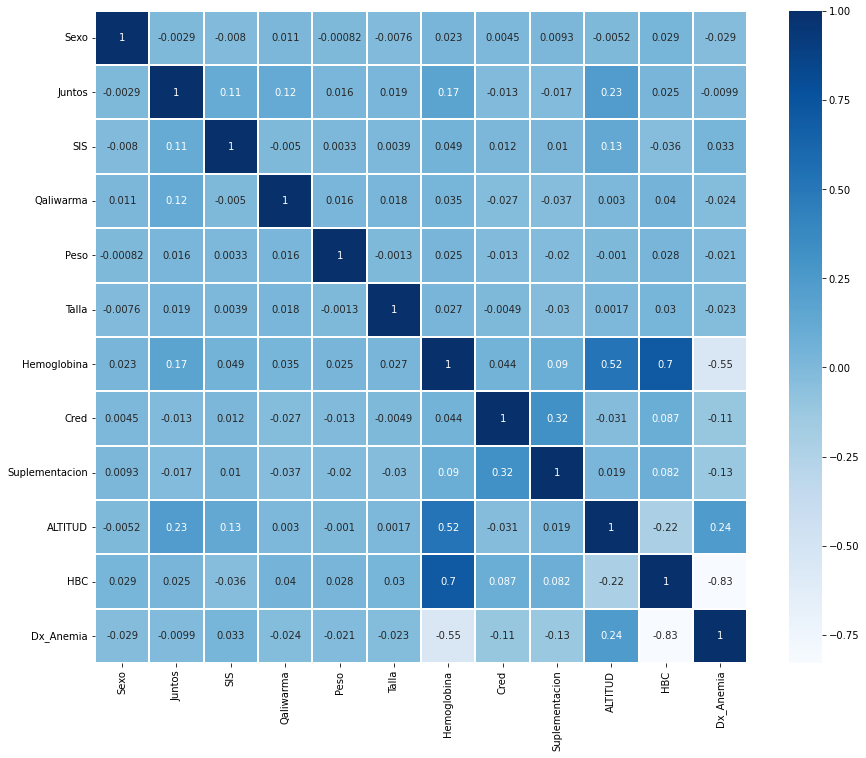

In [211]:
matrix = df.copy()
plt.figure(figsize=(15, 12))
corr = matrix.corr()
sns.heatmap(corr, linewidths=0.1,vmax=1.0, square=True, cmap="Blues", linecolor='white', annot=True)
matrix.head()

### Eliminación de variables no relevantes

In [218]:
data = df.drop(['Sexo', 'Juntos', 'SIS', 'Qaliwarma', 'Peso', 'Talla', 'Cred', 'Suplementacion'], axis=1)
data.head()

,Hemoglobina,ALTITUD,HBC,Dx_Anemia
0,-0.205339,-0.537932,0.319160,-0.636147
1,-0.490348,-0.726024,0.008662,-0.636147
2,0.008417,-0.566870,0.565546,-0.636147
3,-0.704105,-0.820070,-0.237303,-0.636147
4,-0.134087,-0.566870,0.403765,-0.636147


# Clustering

### Silhouette Method

In [230]:
# silhouette score
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

def silhouette(data, n_max):
    best_k = 0
    best_n_clusters = 2
    for n_clusters in range(2, n_max):
        kmeans = KMeans(n_clusters=n_clusters)
        kmeans.fit(data)
        labels = kmeans.predict(data)
        silhouette_avg = silhouette_score(data, labels)
        print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
        if silhouette_avg > best_k:
            best_k = silhouette_avg
            best_n_clusters = n_clusters

    print("The best number of clusters is:", best_n_clusters)
    return best_n_clusters



In [231]:
temp = data.copy()
temp.drop(['Dx_Anemia'], axis=1, inplace=True)
temp.head()

,Hemoglobina,ALTITUD,HBC
0,-0.205339,-0.537932,0.319160
1,-0.490348,-0.726024,0.008662
2,0.008417,-0.566870,0.565546
3,-0.704105,-0.820070,-0.237303
4,-0.134087,-0.566870,0.403765


In [232]:
best_n_clusters = silhouette(temp, 7)
kmeans = KMeans(n_clusters=best_n_clusters, random_state=0).fit(temp)
kmeans.predict(temp)
# print(kmeans.labels_)
# print(kmeans.cluster_centers_)
labels = pd.Series(kmeans.labels_, name="class")
X.join(labels)

For n_clusters = 2 The average silhouette_score is : 0.4589140970471744
For n_clusters = 3 The average silhouette_score is : 0.44230513696906076
For n_clusters = 4 The average silhouette_score is : 0.44073486119960803
For n_clusters = 5 The average silhouette_score is : 0.43741073063767505
For n_clusters = 6 The average silhouette_score is : 0.4344184463552451
The best number of clusters is: 2


,Hemoglobina,Cred,Suplementacion,ALTITUD,HBC,class
0,-0.078689,1.100961,-0.50740,-0.039109,0.217655,1.0
1,-0.452107,-0.908297,-0.50740,0.002378,-0.200372,1.0
2,0.668149,-0.908297,-0.50740,0.002378,0.956451,1.0
3,0.518782,1.100961,1.97083,1.205500,-0.539831,1.0
4,-0.302740,1.100961,1.97083,1.205500,-1.388168,1.0
...,...,...,...,...,...,...
97317,-0.676159,-0.908297,-0.50740,-1.644656,0.145634,NaN
97318,-0.228056,1.100961,1.97083,0.209812,-0.144963,NaN
97319,1.414987,1.100961,-0.50740,0.339252,1.430212,NaN
97320,1.116252,1.100961,1.97083,0.339252,1.121725,NaN


c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


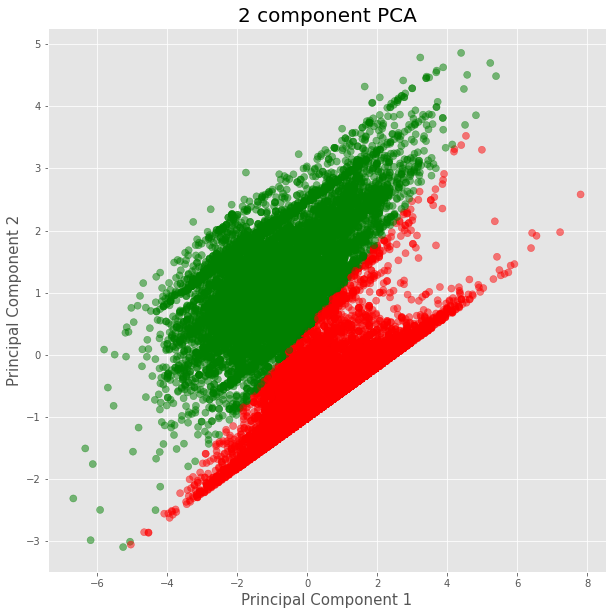

In [246]:
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=best_n_clusters).fit(temp)
centroids = kmeans.cluster_centers_

# Predicting the clusters
labels = kmeans.predict(temp)
# Getting the cluster centers
C = kmeans.cluster_centers_

#transform n variiables to 2 principal components to plot
pca = PCA(n_components=2)
pca_fit = pca.fit(temp)
principalComponents = pca_fit.transform(temp)
principalDf = pd.DataFrame(data = principalComponents
         , columns = ['principal component 1', 'principal component 2'])

colors =['red','green','blue','yellow','orange','pink','black','purple','brown','grey']
centroidColor= []
for item in range(best_n_clusters):
  centroidColor.append(colors[item])

dataPointColor=[]
for row in labels:
  dataPointColor.append(colors[row])

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], 
c=dataPointColor, s=50, alpha=0.5)

C_transformed = pca_fit.transform(C)
plt.scatter(C_transformed[:, 0], C_transformed[:, 1], c=centroidColor, s=200, marker=('x'))
plt.show()

# Variable Analysis

## Qaliwarma affects anemia cases?

In [247]:
df.columns


Index(['Sexo', 'Juntos', 'SIS', 'Qaliwarma', 'Peso', 'Talla', 'Hemoglobina',
       'Cred', 'Suplementacion', 'ALTITUD', 'HBC', 'Dx_Anemia'],
      dtype='object')

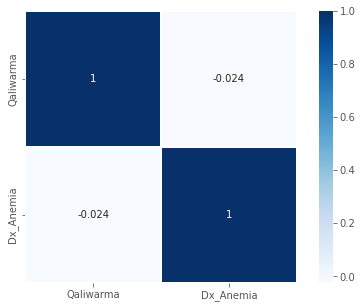

In [248]:
QW_data = df[['Qaliwarma', 'Dx_Anemia']]
# QW_data.loc['Dx_Anemia'] = QW_data['Dx_Anemia'].map({0: 0, 1:0, 2:1, 3:1})


plt.figure(figsize=(8, 5))
corr = QW_data.corr()
sns.heatmap(corr, linewidths=0.1,vmax=1.0, square=True, cmap="Blues", linecolor='white', annot=True)
plt.show() 

## CRED affects anemia cases?

C:\Users\jackc\AppData\Local\Temp\ipykernel_13752\3081099521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cred_data.loc['Dx_Anemia'] = Cred_data['Dx_Anemia'].map({0: 0, 1:0, 2:1, 3:1})


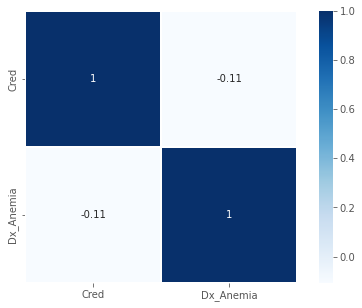

In [249]:
Cred_data = df[['Cred', 'Dx_Anemia']]
Cred_data.loc['Dx_Anemia'] = Cred_data['Dx_Anemia'].map({0: 0, 1:0, 2:1, 3:1})


plt.figure(figsize=(8, 5))
corr = Cred_data.corr()
sns.heatmap(corr, linewidths=0.1,vmax=1.0, square=True, cmap="Blues", linecolor='white', annot=True)
plt.show() 

## Juntos affects anemia cases?  

C:\Users\jackc\AppData\Local\Temp\ipykernel_13752\3147606408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Juntos_data.loc['Dx_Anemia'] = Juntos_data['Dx_Anemia'].map({0: 0, 1:0, 2:1, 3:1})


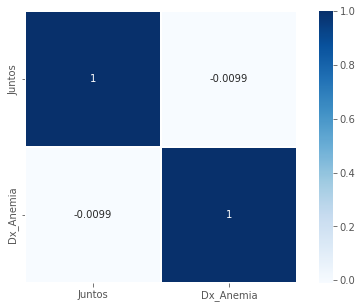

In [250]:
Juntos_data = df[['Juntos', 'Dx_Anemia']]
Juntos_data.loc['Dx_Anemia'] = Juntos_data['Dx_Anemia'].map({0: 0, 1:0, 2:1, 3:1})


plt.figure(figsize=(8, 5))
corr = Juntos_data.corr()
sns.heatmap(corr, linewidths=0.1,vmax=1.0, square=True, cmap="Blues", linecolor='white', annot=True)
plt.show() 